In [86]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import func4behav as fb
import imp
imp.reload(fb)

<module 'func4behav' from 'c:\\Users\\Tianyi Zheng\\OneDrive - neuron.t.u-tokyo.ac.jp\\Documents\\zheng\\mywork\\attention_tES\\tes-attention\\processing\\behavior\\func4behav.py'>

In [87]:
behavior_compare, experiment = fb.create_allsubs_compare()
for subject_id in range (1,19):
    behavior_before, behavior_after = fb.load_behavior(subject_id)
    behavior_compare = fb.allsubs_compare(subject_id, behavior_before, behavior_after, behavior_compare, experiment, verbose=False)
display(behavior_compare)

,subject id,Real stimulation,session,type,cue,valid,ICS,stim,response,reaction time
0,1,1,before,2,1,1,0.5,1,1,0.27437
1,1,1,before,2,-1,1,1.0,-1,1,0.21226
2,1,1,before,1,-1,-1,0.5,1,1,0.40884
3,1,1,before,1,-1,-1,0.5,1,1,0.22220
4,1,1,before,1,1,1,1.0,1,1,0.19879
...,...,...,...,...,...,...,...,...,...,...
4315,18,1,before,1,-1,1,1.0,-1,1,0.24539
4316,18,1,before,1,1,1,1.0,1,1,0.21152
4317,18,1,before,2,1,-1,1.0,-1,1,0.32075
4318,18,1,before,2,-1,-1,0.5,1,1,0.46414


In [88]:
behavior_compare = behavior_compare.loc[(behavior_compare['response'] == 1) & (behavior_compare['reaction time'] > 0.001)]
rt_sham = behavior_compare.loc[behavior_compare['Real stimulation'] == 0]
rt_real = behavior_compare.loc[behavior_compare['Real stimulation'] == 1]
rt_sham = fb.remove_outlier(rt_sham)
rt_real = fb.remove_outlier(rt_real)
rt_sham = rt_sham['reaction time']
rt_real = rt_real['reaction time']

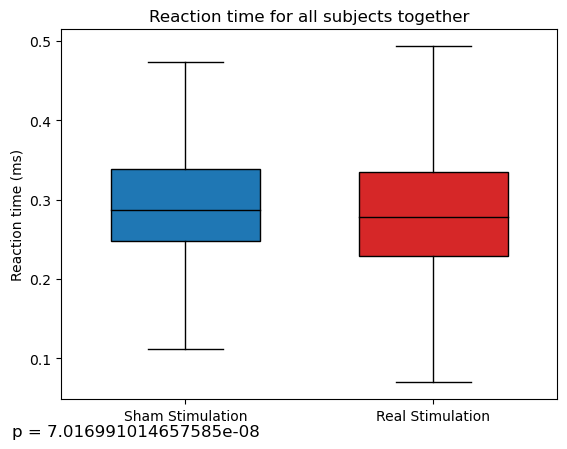

In [89]:
# box plot of RT difference
# for compare_object in compare_objects:

# watch = 'All'
# save_path = os.path.join('..', '..', '..', 'docs', 'report', 'figs', watch+"_"+compare_object+'.png')

# create boxplot
# Create a box plot with whiskers
fig, ax = plt.subplots()
boxplots = ax.boxplot([rt_sham, rt_real], patch_artist=True, widths=0.6, showfliers=False)

# Set colors for the box plots
colors = ['#1f77b4', '#d62728']
for patch, color in zip(boxplots['boxes'], colors):
    patch.set_facecolor(color)

# Set median line color to black
for median in boxplots['medians']:
    median.set_color('black')

plt.xticks([1, 2], ['Sham Stimulation', 'Real Stimulation'])
plt.ylabel('Reaction time (ms)')
plt.title('Reaction time for all subjects together')

# Perform the Mann-Whitney U test
U, p_value = stats.mannwhitneyu(rt_sham, rt_real)

# Add the p-value to the plot
ax.annotate(f'p = {p_value}', # :.4f means 4 decimal places
            xy=(-0.1, -0.1),
            xycoords=('axes fraction', 'axes fraction'),
            ha='left', fontsize=12)
# plt.savefig(save_path, format='png')

plt.show()

In [90]:
compare_objects = ["RT mean shorten %"]# , "RT std decrease"]
behavior_compare = fb.create_compare()
for subject_id in range (1,19):
    behavior_before, behavior_after = fb.load_behavior(subject_id)
    behavior_compare = fb.make_compare(subject_id, behavior_before, behavior_after, behavior_compare) #, verbose=True)

behavior_watch = behavior_compare[behavior_compare['Real stimulation'] == 1]
display(behavior_watch.drop(['trials_before', 'trials_after'], axis=1))

behavior_watch = behavior_compare[behavior_compare['Real stimulation'] == 0]
display(behavior_watch.drop(['trials_before', 'trials_after'], axis=1))

# real_to_pick = [1,3,5,9]
# sham_to_pick = [2,11,15,16]
display(behavior_compare.drop(['trials_before', 'trials_after'], axis=1))

,subject id,Real stimulation,RT mean shorten,RT median shorten,RT mean shorten %,RT std decrease,RT median shorten %
0,1,1,26.76976,26.99,12.514885,-16.933321,12.794501
2,3,1,39.406929,36.3,15.664043,4.59993,15.138877
3,4,1,-9.532244,-13.04,-3.685283,-14.812028,-5.433107
4,5,1,55.211244,57.11,18.095039,-5.470487,18.979097
8,9,1,40.240727,33.8,11.580899,23.505534,10.077069
11,12,1,-41.41479,-41.34,-16.047443,-18.270812,-16.794637
12,13,1,-30.04954,-33.02,-11.55628,-2.499129,-13.019991
16,17,1,19.494964,27.23,4.828231,6.334261,6.944126
17,18,1,24.672682,31.22,7.765791,4.402324,9.958533


,subject id,Real stimulation,RT mean shorten,RT median shorten,RT mean shorten %,RT std decrease,RT median shorten %
1,2,0,38.430033,34.735,11.058114,24.118791,10.20612
5,6,0,-19.277022,-22.24,-7.060572,-13.305289,-8.435106
6,7,0,28.859101,27.66,9.687455,1.146242,9.81495
7,8,0,44.000276,40.49,16.138321,12.637271,15.477829
9,10,0,10.94011,9.585,4.150813,8.713362,3.728484
10,11,0,15.213258,15.245,5.883956,9.027588,5.968484
13,14,0,50.851071,48.75,14.137163,25.097425,13.944707
14,15,0,11.47056,22.115,2.980472,-6.116775,5.766999
15,16,0,22.358248,25.615,7.407182,6.138122,8.525971


,subject id,Real stimulation,RT mean shorten,RT median shorten,RT mean shorten %,RT std decrease,RT median shorten %
0,1,1,26.76976,26.99,12.514885,-16.933321,12.794501
1,2,0,38.430033,34.735,11.058114,24.118791,10.20612
2,3,1,39.406929,36.3,15.664043,4.59993,15.138877
3,4,1,-9.532244,-13.04,-3.685283,-14.812028,-5.433107
4,5,1,55.211244,57.11,18.095039,-5.470487,18.979097
5,6,0,-19.277022,-22.24,-7.060572,-13.305289,-8.435106
6,7,0,28.859101,27.66,9.687455,1.146242,9.81495
7,8,0,44.000276,40.49,16.138321,12.637271,15.477829
8,9,1,40.240727,33.8,11.580899,23.505534,10.077069
9,10,0,10.94011,9.585,4.150813,8.713362,3.728484


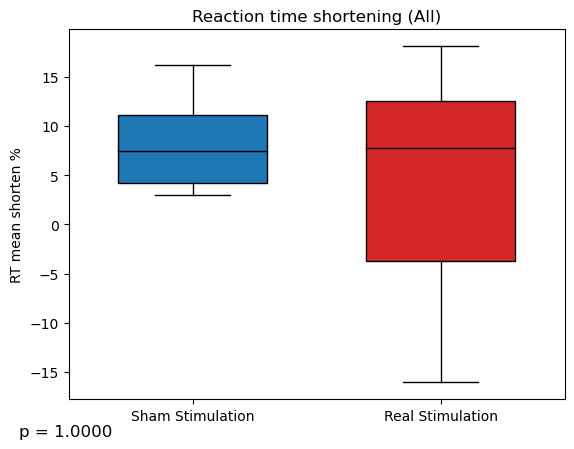

In [91]:
# box plot of RT difference
# compare_objects = ["RT mean shorten %", "RT std decrease"]
for compare_object in compare_objects:
    watch = 'All'
    save_path = os.path.join('..', '..', '..', 'docs', 'report', 'figs', watch+"_"+compare_object+'.png')

    rt_diff_sham = behavior_compare.loc[behavior_compare['Real stimulation'] == 0, compare_object]
    rt_diff_real = behavior_compare.loc[behavior_compare['Real stimulation'] == 1, compare_object]
    rt_diff_sham = pd.to_numeric(rt_diff_sham)
    rt_diff_real = pd.to_numeric(rt_diff_real)

    # create boxplot
    # Create a box plot with whiskers
    fig, ax = plt.subplots()
    boxplots = ax.boxplot([rt_diff_sham, rt_diff_real], patch_artist=True, widths=0.6, showfliers=False)

    # Set colors for the box plots
    colors = ['#1f77b4', '#d62728']
    for patch, color in zip(boxplots['boxes'], colors):
        patch.set_facecolor(color)

    # Set median line color to black
    for median in boxplots['medians']:
        median.set_color('black')

    plt.xticks([1, 2], ['Sham Stimulation', 'Real Stimulation'])
    plt.ylabel(compare_object)
    plt.title('Reaction time shortening' + ' (' + watch + ')')

    # Perform the Mann-Whitney U test
    U, p_value = stats.mannwhitneyu(rt_diff_sham, rt_diff_real)

    # Add the p-value to the plot
    ax.annotate(f'p = {p_value:.4f}',
                xy=(-0.1, -0.1),
                xycoords=('axes fraction', 'axes fraction'),
                ha='left', fontsize=12)
    # plt.savefig(save_path, format='png')

    plt.show()